## Demostracion del algoritmo y exploración
### John Ureña

In [1]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import constants
from utils import SessionManager
from GenerateData import generate_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

In [4]:
vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [5]:
driver = SessionManager()
queries = constants.queries_dict
def get_data():
    pagerank = driver.bring_data(queries['page_rank'])
    degree = driver.bring_data(queries['degree'])
    closeness = driver.bring_data(queries['closeness'])
    clustering = driver.bring_data(queries['clustering'])
    data = pd.merge(pagerank, degree, on='name')
    data = pd.merge(data, closeness, on='name')
    data = pd.merge(data, clustering, on='name')
    return data

In [8]:
graph_data = get_graph_data(db_host, db_user, db_password)
data = get_data()
tsp = TSP(graph_data, 'Hub', data)
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=1,
                                    cooling_factor=0.1, minimum_temperature=0.99))



(['Hub', 'Location1', 'Location2', 'Location4', 'Location3', 'Location1'], 43.0)


In [11]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [500, 800, 1000],
        'cooling_factor': [0.1, 0.3, 0.9],
        'n': [1, 5, 10]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=3, multipl=1.5)
best_results

[((1000, 0.1, 5), 43.0, 0.028009414672851562),
 ((500, 0.3, 5), 43.0, 0.049973249435424805),
 ((500, 0.1, 10), 43.0, 0.05115365982055664),
 ((500, 0.3, 10), 43.0, 0.10167837142944336),
 ((1000, 0.3, 10), 43.0, 0.10320305824279785),
 ((800, 0.9, 1), 43.0, 0.10909533500671387),
 ((500, 0.9, 5), 43.0, 0.5041565895080566),
 ((800, 0.9, 5), 43.0, 0.5445098876953125),
 ((1000, 0.9, 5), 43.0, 0.5543661117553711),
 ((500, 0.9, 10), 43.0, 0.9638118743896484),
 ((800, 0.9, 10), 43.0, 1.087364912033081),
 ((1000, 0.9, 10), 43.0, 1.133007526397705),
 ((800, 0.1, 5), 45.0, 0.025488615036010742),
 ((1000, 0.3, 5), 45.0, 0.04960012435913086),
 ((800, 0.1, 10), 45.0, 0.051605939865112305),
 ((800, 0.3, 10), 45.0, 0.1027989387512207),
 ((1000, 0.1, 1), 46.0, 0.010038375854492188),
 ((800, 0.1, 1), 46.0, 0.010279178619384766),
 ((500, 0.1, 1), 46.0, 0.023885250091552734),
 ((800, 0.3, 5), 46.0, 0.05204939842224121),
 ((1000, 0.9, 1), 46.0, 0.11046552658081055),
 ((500, 0.9, 1), 46.0, 0.13471627235412598

(1000, 0.1, 5)


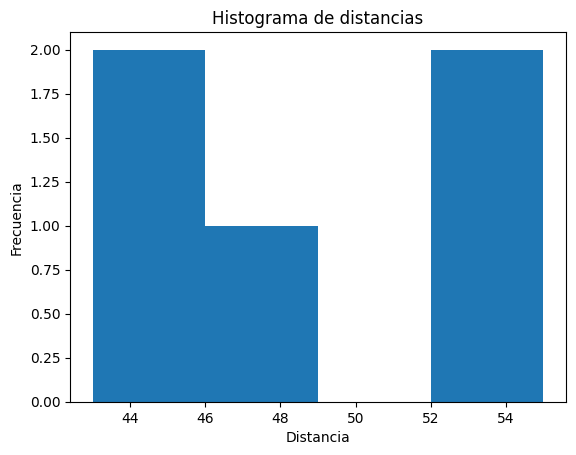

In [15]:
print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])


In [16]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [17]:
graph_data = get_graph_data(db_host, db_user, db_password)
data = get_data()
tsp = TSP(graph_data, 'l1',data)
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=10, initial_temperature=2000, n=8,
                                    cooling_factor=0.4, minimum_temperature=0.99))


(['l1', 'l13', 'l6', 'l8', 'l9', 'l4', 'l10', 'l1', 'l5', 'l2', 'l7', 'l14', 'l3', 'l15', 'l12', 'l11'], 69.0)


In [18]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [500, 1000, 2000],
        'cooling_factor': [0.4, 0.7, 0.9],
        'n': [5, 10, 15]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=3)
best_results

[((1000, 0.9, 5), 64.0, 0.5970525741577148),
 ((1000, 0.4, 5), 71.0, 0.07841062545776367),
 ((1000, 0.7, 5), 71.0, 0.17470192909240723),
 ((500, 0.9, 15), 71.0, 1.5822312831878662),
 ((1000, 0.9, 10), 72.0, 1.147357702255249),
 ((2000, 0.7, 10), 76.0, 0.45505523681640625),
 ((500, 0.7, 10), 77.0, 0.3095715045928955),
 ((2000, 0.7, 15), 77.0, 0.5874862670898438),
 ((2000, 0.9, 15), 78.0, 2.0216920375823975),
 ((500, 0.4, 5), 80.0, 0.11942887306213379),
 ((1000, 0.9, 15), 81.0, 1.6534440517425537),
 ((2000, 0.4, 5), 83.0, 0.09280967712402344),
 ((500, 0.7, 15), 83.0, 0.4640936851501465),
 ((2000, 0.9, 10), 84.0, 1.4106066226959229),
 ((500, 0.9, 10), 85.0, 1.0582351684570312),
 ((2000, 0.4, 15), 86.0, 0.3134331703186035),
 ((1000, 0.7, 10), 86.0, 0.44121861457824707),
 ((2000, 0.9, 5), 88.0, 0.8524906635284424),
 ((500, 0.4, 10), 89.0, 0.13100552558898926),
 ((500, 0.4, 15), 89.0, 0.19015812873840332),
 ((500, 0.9, 5), 89.0, 0.5141973495483398),
 ((2000, 0.7, 5), 96.0, 0.2404773235321045

(1000, 0.9, 5)


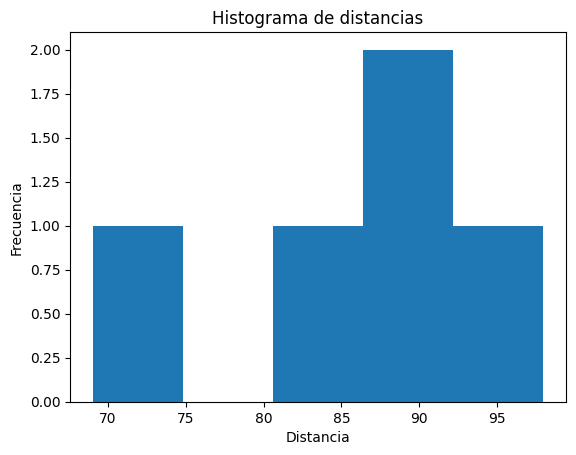

In [21]:
print(best_results[0][0])
simulated_annealing.plot_n_results(5, 10, *best_results[0][0])

In [20]:
# Esto puede tomar varios minutos
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print(f"Matriz de tamaño {n}")
    # Esto esta probando con los mejores parametros para la matriz de random_distance_matrix.csv
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño 5
5.98 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 10
6.17 s ± 371 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 20
6.63 s ± 481 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 40
6.35 s ± 249 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Matriz de tamaño 60
6.54 s ± 389 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
